In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('KNN_Project_Data')

In [48]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [49]:
#sns.pairplot(df, hue = 'TARGET CLASS')

In [50]:
#    dataframe. corr() is used to find the pairwise correlation of all 
#    columns in the dataframe. Any na values are automatically excluded. 
#    For any non-numeric data type columns 
#    in the dataframe it is ignored

#    Pandas sort_values() function sorts a data frame in Ascending or Descending order
#    of passed Column. It's different than the sorted Python function since it cannot 
#    sort a data frame and particular column cannot be selected. Every parameter has 
#    some default values execept the 'by' parameter.


df.corr()['TARGET CLASS'].sort_values()

GWYH           -0.416168
JHZC           -0.301725
GUUB           -0.174496
TLLZ           -0.172029
MGJM           -0.098887
XVPM           -0.079896
HYKR           -0.015266
EDFS            0.281607
IGGA            0.295390
TRAT            0.489347
TARGET CLASS    1.000000
Name: TARGET CLASS, dtype: float64

In [51]:
#plt.figure(figsize = (12,6)) #Increases the plot size
#sns.scatterplot(x = 'TRAT', y = 'GWYH', data = df)

In [52]:
#     The sklearn.preprocessing package provides several common utility functions and 
#     transformer classes to change raw feature vectors into a representation that is 
#     more suitable for the downstream estimators.

#     In general, learning algorithms benefit from standardization of the data set. If 
#     some outliers are present in the set, robust scalers or transformers are more appropriate. 
#     The behaviors of the different scalers, transformers, and normalizers on a dataset 
#     containing marginal outliers is highlighted in Compare the effect of different scalers on 
#     data with outliers.


from sklearn.preprocessing import StandardScaler

In [53]:
#     StandardScaler. StandardScaler standardizes a feature by subtracting the mean and 
#     then scaling to unit variance. Unit variance means dividing all the values by the 
#     standard deviation

scaler = StandardScaler()

In [54]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [55]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [56]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [57]:
#     StandardScaler. StandardScaler standardizes a feature by subtracting the mean and 
#     then scaling to unit variance. Unit variance means dividing all the values by the 
#     standard deviation


from sklearn.model_selection import train_test_split

In [58]:
#       The test set is a subset of the data set that you use 
#       to test your model after the model has gone through initial 
#       vetting by the validation set. x_test is the test data set. y_test 
#       is the set of labels to all the data in x_test .

#       test_size — This parameter decides the size of the data that has to be split 
#       as the test dataset. This is given as a fraction

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [59]:
#       K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one 
#       of the topmost machine learning algorithms. KNN used in the variety of applications 
#       such as finance, healthcare, political science, handwriting detection, image recognition 
#       and video recognition. In Credit ratings, financial institutes will predict the credit 
#       rating of customers. In loan disbursement, banking institutes will predict whether the 
#       loan is safe or risky. In political science, classifying potential voters in two classes 
#       will vote or won’t vote. KNN algorithm used for both classification and regression problems. 
#       KNN algorithm based on feature similarity approach




from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
pred = knn.predict(X_test)

In [63]:
#     The sklearn. metrics module implements several loss, score, and utility 
#     functions to measure classification performance. Some metrics might require 
#     probability estimates of the positive class, confidence values, or binary 
#     decisions values

from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(confusion_matrix(y_test,pred))

[[ 94  44]
 [ 44 118]]


In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       138
           1       0.73      0.73      0.73       162

    accuracy                           0.71       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.71      0.71      0.71       300



In [66]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

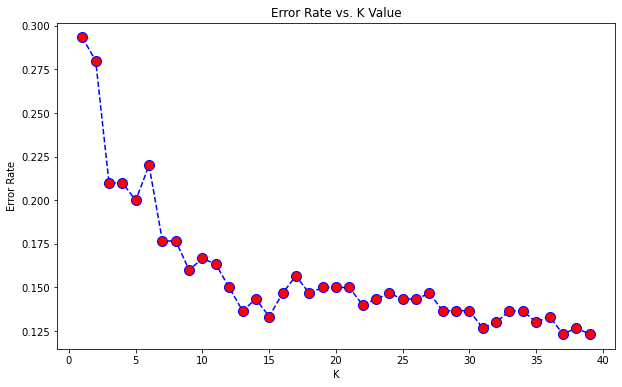

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[118  20]
 [ 21 141]]


              precision    recall  f1-score   support

           0       0.85      0.86      0.85       138
           1       0.88      0.87      0.87       162

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

